In [1]:
import pandas as pd



In [2]:
my_news = pd.read_csv("train.csv")

In [3]:
#fropping the nan values since we don't need it
my_news.dropna(inplace=True)

In [4]:
train_data = my_news.drop('label',axis=1)
labels = my_news["label"]

In [5]:
labels.head(2)

0    1
1    0
Name: label, dtype: int64

In [6]:
import tensorflow

In [7]:
from tensorflow.keras.layers import Embedding

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


In [8]:
from tensorflow import keras

In [9]:
vocab_size = 5000
messages = train_data.copy()
messages.reset_index(inplace=True)

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [11]:
my_data =[x for x in messages["text"]]

In [12]:
label =["Real","Fake"]

In [13]:
import numpy as np 

labels = np.array(labels)

In [14]:
train_labels = tensorflow.keras.utils.to_categorical(labels,len(label))

In [18]:
vocab_size = 10000
embedding_dim = 30
max_len = 1000

In [19]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token="<OOV>")
tokenizer.fit_on_texts(my_data)

In [20]:
training_seq = tokenizer.texts_to_sequences(my_data)

In [21]:
training_padded  = pad_sequences(training_seq,maxlen=max_len,padding='post',truncating='post')

In [22]:
training_padded.shape

(18285, 1000)

In [23]:
model = tensorflow.keras.Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_len),
    LSTM(units=128,return_sequences=True),
    keras.layers.Dropout(rate=0.5),
    LSTM(units=128,return_sequences=True),
    tensorflow.keras.layers.Dropout(rate=0.5),
    LSTM(units=64),
    Dense(units=60,activation="relu"),
  Dense(len(label),activation="softmax")



    
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 30)          300000    
_________________________________________________________________
lstm (LSTM)                  (None, 1000, 128)         81408     
_________________________________________________________________
dropout (Dropout)            (None, 1000, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000, 128)         131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000, 128)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 60)                3

In [25]:
model.compile(optimizer = "Adam",loss=tensorflow.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])


In [26]:
batch_size=64
history = model.fit(training_padded,train_labels,batch_size=batch_size,epochs=30,validation_split=0.2,verbose=1)

Epoch 1/30
 10/229 [>.............................] - ETA: 34:45 - loss: 0.6915 - accuracy: 0.5381

KeyboardInterrupt: 

Text(0.5, 0, 'epoch')

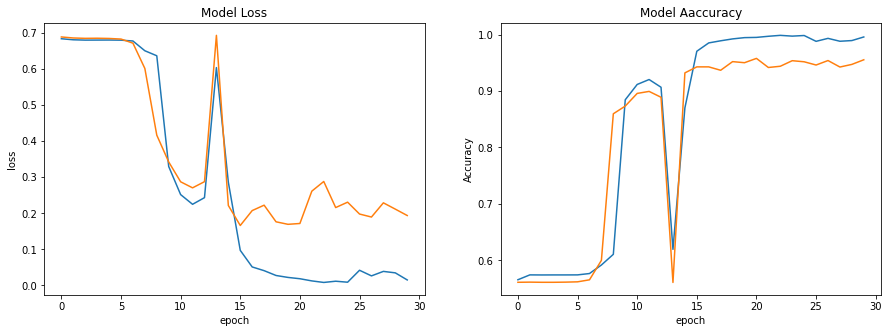

In [27]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(history.history["loss"])
ax[0].plot(history.history["val_loss"])
ax[0].set_ylabel("loss")
ax[0].set_xlabel("epoch")
ax[0].set_title('Model Loss')

ax[1].set_title('Model Aaccuracy')
ax[1].plot(history.history["accuracy"])
ax[1].plot(history.history["val_accuracy"])
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("epoch")

In [30]:

model.save("../models/mymodels")

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/mymodels/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/mymodels/assets


In [ ]:
import json

In [ ]:
my_json = tokenizer.to_json()

In [ ]:
with open("my_json.json","w") as outfile:
  json.dumps(my_json)